Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Reading The Dataset

In [ ]:
df = pd.read_csv("/content/Diamond Price Prediction.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Providing some basic information of the data

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.describe()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
U1 = df['Cut(Quality)'].unique()
print(U1)
U2 = df['Color'].unique()
print(U2)
U3 = df['Clarity'].unique()
print(U3)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Label encoding some columns

In [ ]:
le = LabelEncoder()


In [ ]:
df['Cut(Quality)'] = le.fit_transform(df['Cut(Quality)'])
df['Color'] = le.fit_transform(df['Color'])
df['Clarity'] = le.fit_transform(df['Clarity'])

Finding outliners using boxplot

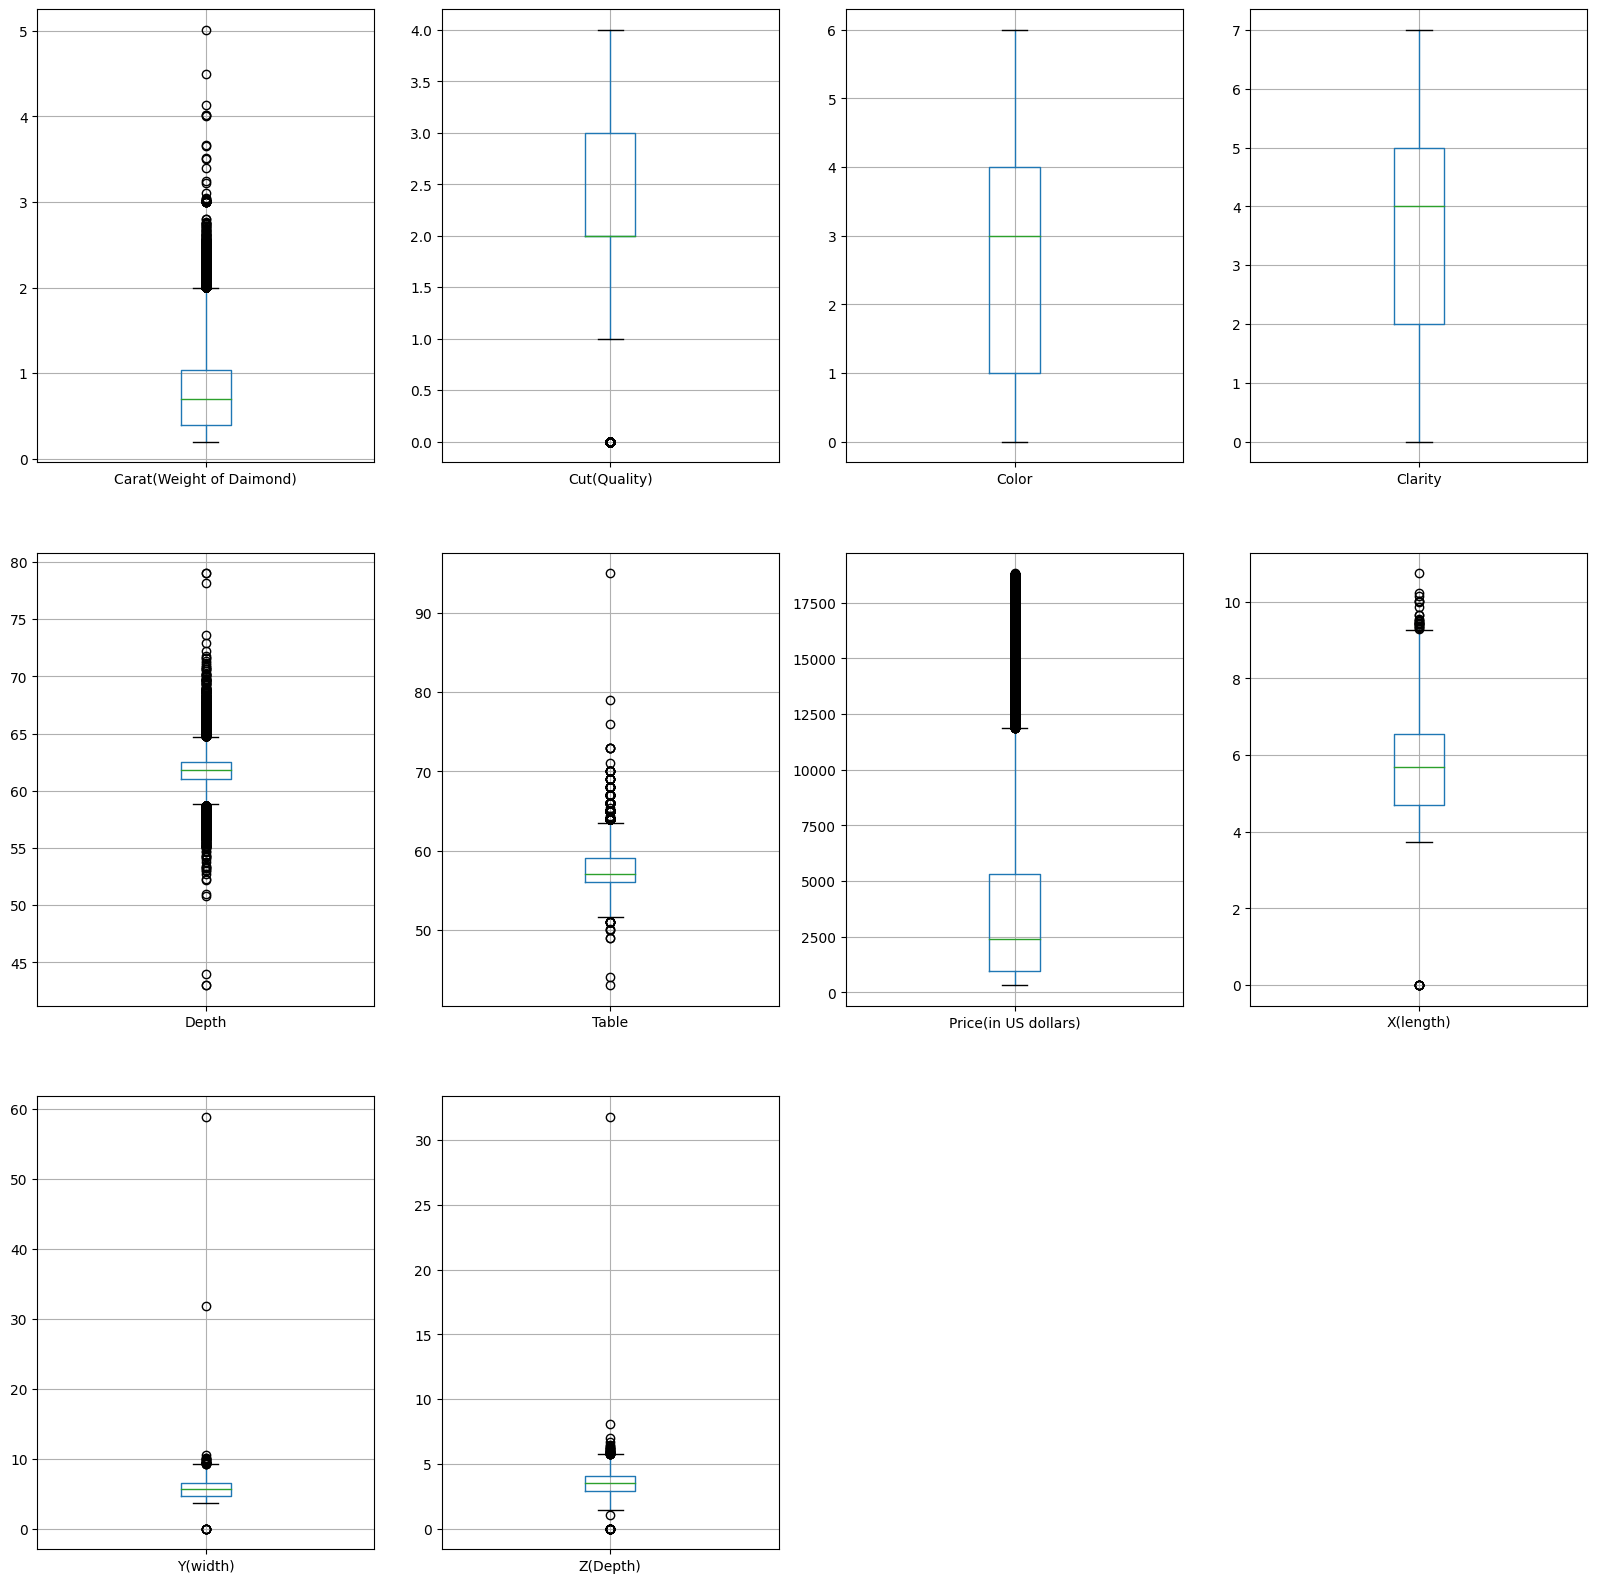

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in df.columns:
    plt.subplot(3,4,i)
    df[[col]].boxplot()
    i+=1

Comparing different features using pairplot

<function matplotlib.pyplot.show(close=None, block=None)>

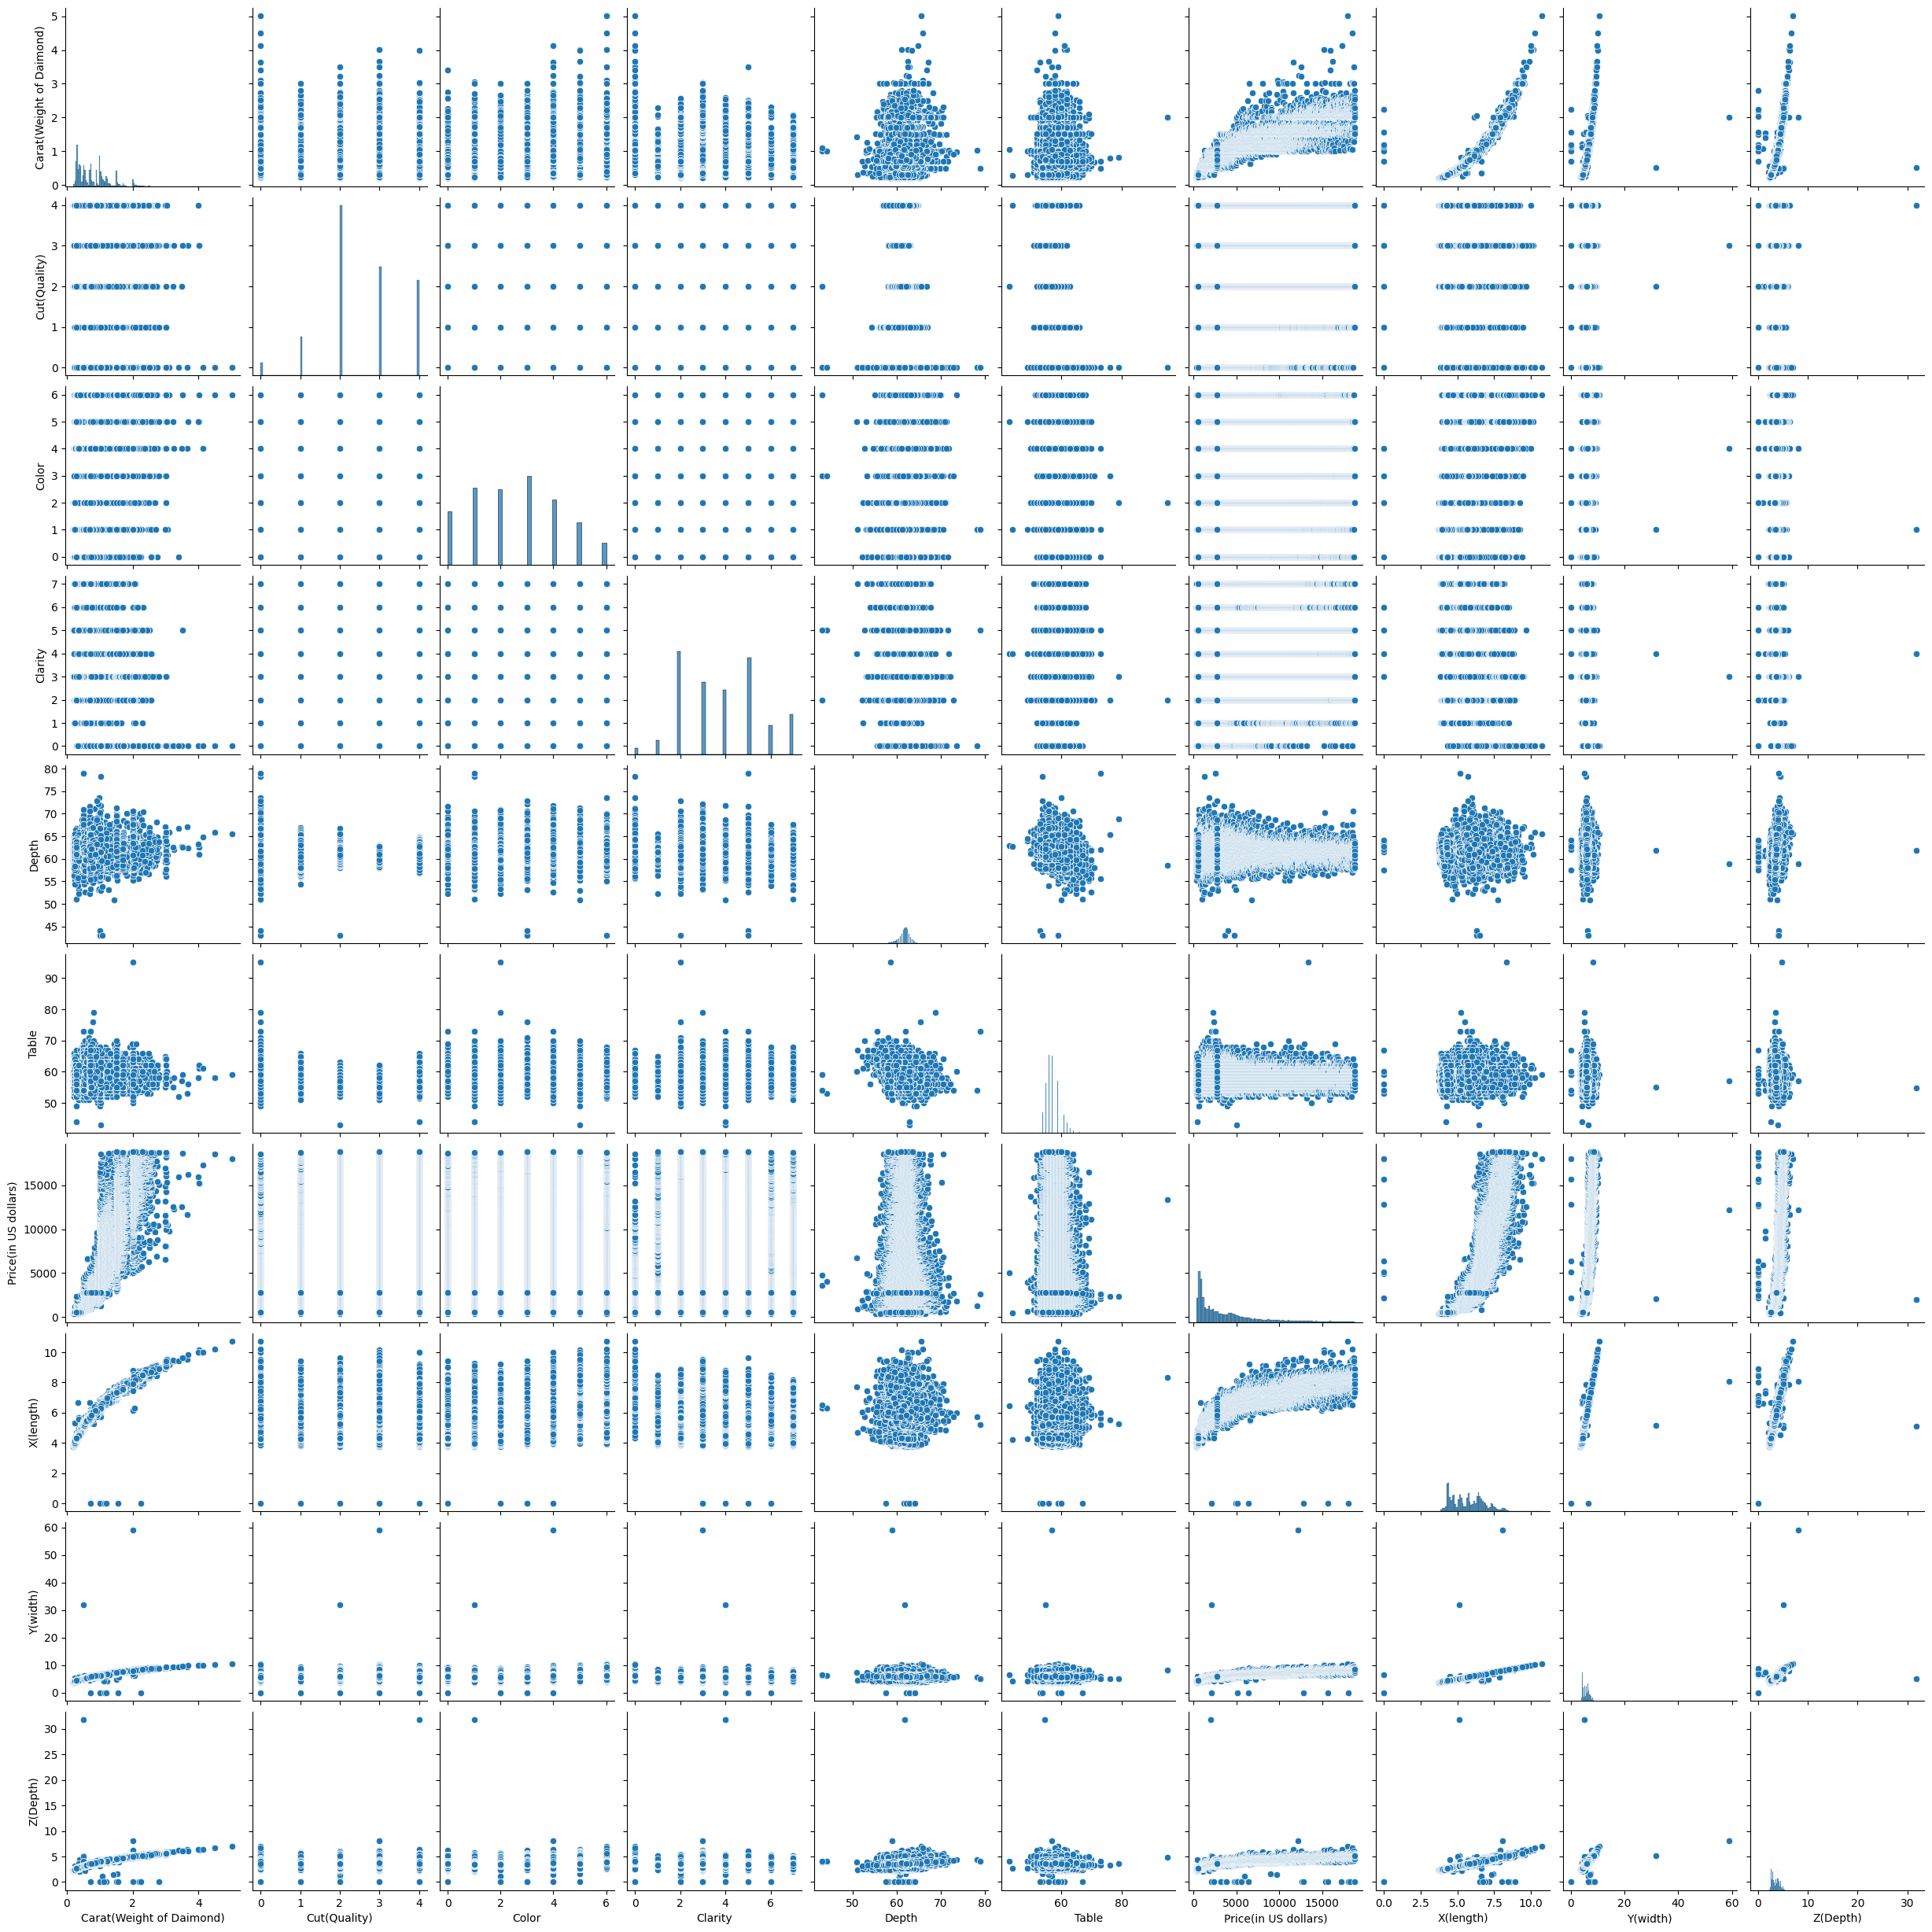

In [ ]:
sns.pairplot(df[['Carat(Weight of Daimond)','Cut(Quality)','Color','Clarity','Depth','Table','Price(in US dollars)','X(length)','Y(width)','Z(Depth)']])
plt.show

finding correlation between different feartures

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                          Carat(Weight of Daimond)  Cut(Quality)     Color  \
Carat(Weight of Daimond)                  1.000000      0.017124  0.291437   
Cut(Quality)                              0.017124      1.000000  0.000304   
Color                                     0.291437      0.000304  1.000000   
Clarity                                  -0.214290      0.028235 -0.027795   
Depth                                     0.028224     -0.194249  0.047279   
Table                                     0.181618      0.150327  0.026465   
Price(in US dollars)                      0.921591      0.039860  0.172511   
X(length)                                 0.975094      0.022342  0.270287   
Y(width)                                  0.951722      0.027572  0.263584   
Z(Depth)                                  0.953387      0.002037  0.268227   

                           Clarity     Depth     Table  Price(in US dollars)  \
Carat(Weight of Daimond) -0.214290  0.028224  0.181618       

Plotting a heatmap for visualizing correlation

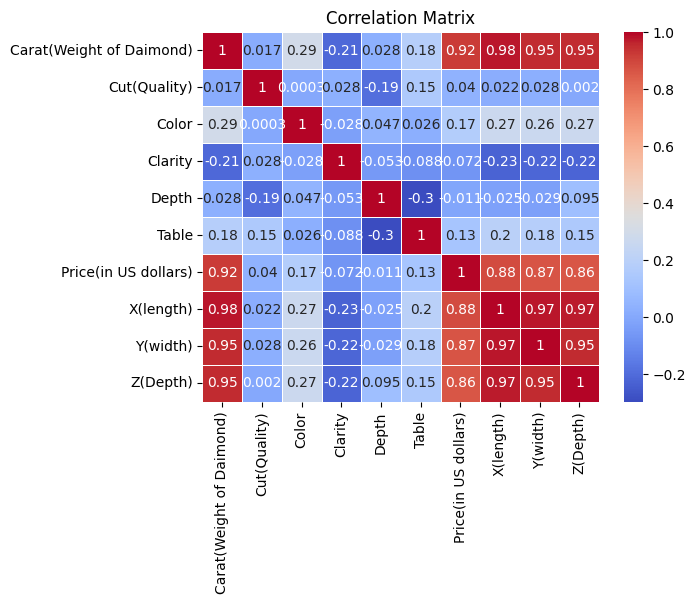

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
x = df.drop('Price(in US dollars)',axis=1)
y = df['Price(in US dollars)']

splitting the dataset in test and train

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


In [ ]:
x_train

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,X(length),Y(width),Z(Depth)
27716,0.36,3,1,3,62.6,57.0,4.54,4.50,2.83
45246,0.61,2,3,2,61.7,55.0,5.46,5.49,3.38
32768,0.34,3,0,2,59.8,61.0,4.53,4.50,2.70
7779,1.02,3,5,2,58.0,58.0,6.84,6.60,3.90
45734,0.52,2,4,4,61.0,56.0,5.15,5.23,3.17
...,...,...,...,...,...,...,...,...,...
38445,0.35,2,3,6,61.0,56.0,4.56,4.59,2.79
2118,1.02,0,6,3,65.0,59.0,6.34,6.24,4.08
21997,1.20,3,2,7,60.5,60.0,6.98,6.87,4.19
34848,0.30,4,3,7,63.5,56.0,4.34,4.29,2.74


In [ ]:
y_train

27716      648
45246     1659
32768      803
7779      4284
45734     1699
         ...  
38445     1028
2118      3119
21997    10064
34848      878
22900    10939
Name: Price(in US dollars), Length: 43152, dtype: int64

Creating and fitting Linear Regression Model and printing performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
y_pred_test = model.predict(x_test)
lrmae = mean_absolute_error(y_test, y_pred_test)
lrmse = mean_squared_error(y_test, y_pred_test)
lrr2 = r2_score(y_test, y_pred_test)
print("-----Model Evaluation on Test Data-----")
print("MAE:",lrmae)
print("MSE:",lrmse)
print("R2_score:",lrr2)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})

-----Model Evaluation on Test Data-----
MAE: 866.1584241168621
MSE: 1801376.38793069
R2_score: 0.8882283690615171


,Actual,Predicted
36976,963,1151.196781
5323,3806,3814.295465
47458,1857,2641.335458
7931,4318,5613.691564
12396,5233,6113.440271
...,...,...
28096,663,-397.232471
31372,761,1196.511182
33652,834,-540.117763
20526,8852,8694.095704


Creating and fitting K-Neighbors Regressor Model and printing performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(x_train, y_train)
y_pred_test = knn_regr.predict(x_test)
knnmae = mean_absolute_error(y_test, y_pred_test)
knnmse = mean_squared_error(y_test, y_pred_test)
knnr2 = r2_score(y_test, y_pred_test)
print("-----Model Evaluation on Test Data-----")
print("MAE:",knnmae)
print("MSE:",knnmse)
print("R2_score:",knnr2)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})

-----Model Evaluation on Test Data-----
MAE: 484.190730441231
MSE: 818097.4173526141
R2_score: 0.9492387691896511


,Actual,Predicted
36976,963,1358.4
5323,3806,4676.6
47458,1857,1952.4
7931,4318,4221.8
12396,5233,5247.6
...,...,...
28096,663,552.8
31372,761,828.2
33652,834,777.8
20526,8852,8527.0


Creating and fitting Decision Tree Regressor Model and printing performance metrics

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=80)
dtr.fit(x_train, y_train)
y_pred_test = dtr.predict(x_test)
dtrmae = mean_absolute_error(y_test, y_pred_test)
dtrmse = mean_squared_error(y_test, y_pred_test)
dtrr2 = r2_score(y_test, y_pred_test)
print("-----Model Evaluation on Test Data-----")
print("MAE:",dtrmae)
print("MSE:",dtrmse)
print("R2_score:",dtrr2)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})

-----Model Evaluation on Test Data-----
MAE: 367.06192065257693
MSE: 564963.3064979607
R2_score: 0.9649452104453227


,Actual,Predicted
36976,963,995.0
5323,3806,4460.0
47458,1857,1857.0
7931,4318,4442.0
12396,5233,5466.0
...,...,...
28096,663,593.0
31372,761,795.0
33652,834,855.0
20526,8852,8856.0


Creating and fitting Gradient Boosting Regressor Model and printing performance metrics

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
y_pred_test = gbr.predict(x_test)
gbrmae = mean_absolute_error(y_test, y_pred_test)
gbrmse = mean_squared_error(y_test, y_pred_test)
gbrr2 = r2_score(y_test, y_pred_test)
print("-----Model Evaluation on Test Data-----")
print("MAE:",gbrmae)
print("MSE:",gbrmse)
print("R2_score:",gbrr2)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})

-----Model Evaluation on Test Data-----
MAE: 368.2292545920788
MSE: 456700.20260825776
R2_score: 0.9716627092275262


,Actual,Predicted
36976,963,1067.331843
5323,3806,4216.716351
47458,1857,1831.716121
7931,4318,4735.575214
12396,5233,5264.908467
...,...,...
28096,663,640.432391
31372,761,941.156889
33652,834,712.232962
20526,8852,9015.349026


Creating and fitting Random Forest Regressor Model and printing performance metrics

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train)
y_pred_test = rfr.predict(x_test)
rfrmae = mean_absolute_error(y_test, y_pred_test)
rfrmse = mean_squared_error(y_test, y_pred_test)
rfrr2 = r2_score(y_test, y_pred_test)
print("-----Model Evaluation on Test Data-----")
print("MAE:",rfrmae)
print("MSE:",rfrmse)
print("R2_score:",rfrr2)
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})

-----Model Evaluation on Test Data-----
MAE: 274.7043162596889
MSE: 310757.09532343404
R2_score: 0.9807181732797631


,Actual,Predicted
36976,963,966.61
5323,3806,4066.81
47458,1857,1801.44
7931,4318,4326.12
12396,5233,5653.97
...,...,...
28096,663,646.42
31372,761,823.70
33652,834,807.61
20526,8852,8569.17


In [ ]:
MSE = {
  "Linear Regression": lrmse,
  "KNeighbors Regressor": knnmse,
  "Decision Tree Regressor":  dtrmse,
  "Gradient Boosting Regressor": gbrmse,
  "Random Forest Regressor" : rfrmse
}

R2 = {
  "Linear Regression": lrr2,
  "KNeighbors Regressor": knnr2,
  "Decision Tree Regressor": dtrr2,
  "Gradient Boosting Regressor": gbrr2,
  "Random Forest Regressor" : rfrr2
}

MAE = {
  "Linear Regression": lrmae,
  "KNeighbors Regressor": knnmae,
  "Decision Tree Regressor": dtrmae,
  "Gradient Boosting Regressor":  gbrmae,
  "Random Forest Regressor" : rfrmae
}

Plotting MSE of all models

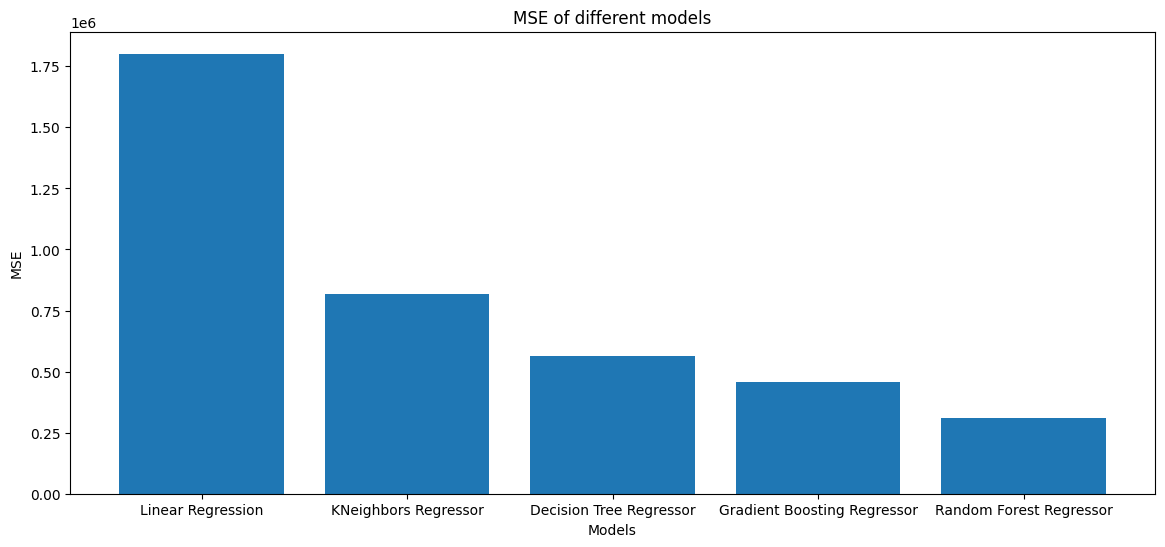

In [ ]:
names = list(MSE.keys())
values = list(MSE.values())
plt.figure(figsize=(14,6))
plt.bar(range(len(MSE)), values, tick_label=names)
plt.ylabel("MSE")
plt.xlabel("Models")
plt.title("MSE of different models")
plt.show()

Plotting R2 score of all Models

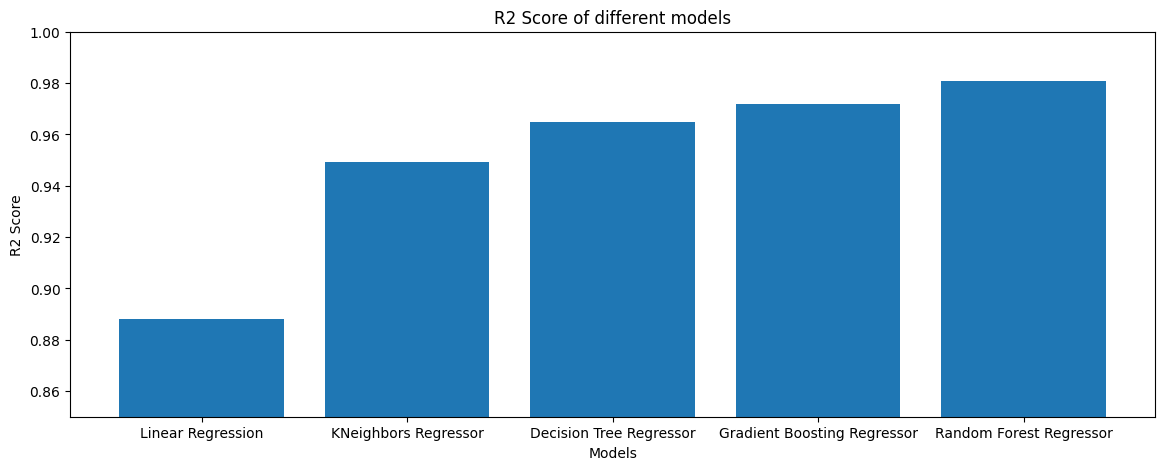

In [ ]:
names = list(R2.keys())
values = list(R2.values())
plt.figure(figsize=(14,5))
plt.ylim([0.85, 1])
plt.bar(range(len(R2)), values, tick_label=names)
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.title("R2 Score of different models")
plt.show()

Plotting MAE of all Models

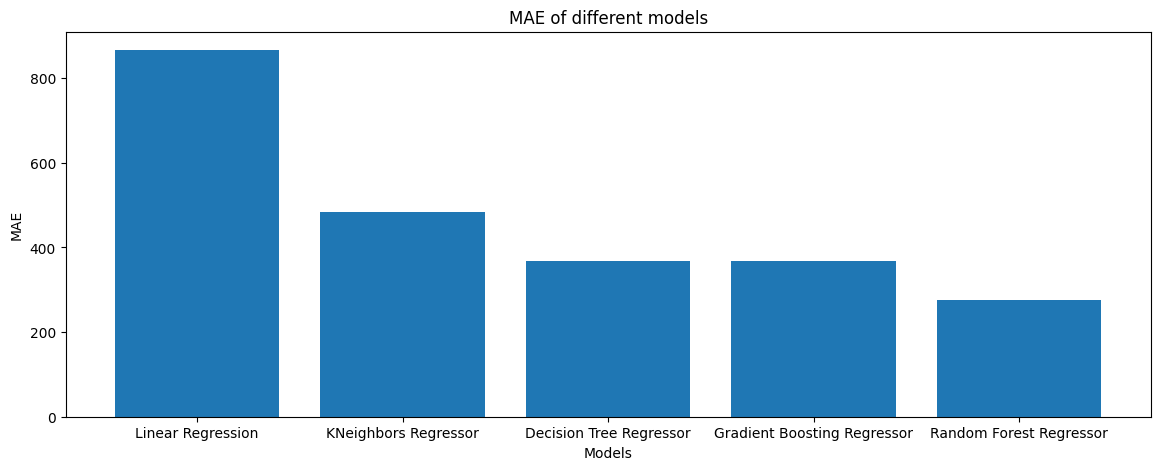

In [ ]:
names = list(MAE.keys())
values = list(MAE.values())
plt.figure(figsize=(14,5))
plt.bar(range(len(MAE)), values, tick_label=names)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("MAE of different models")
plt.show()